### AI_HW_13

인공지능 과제 13 - 한동민, 최동우, 최동규
1. 데이터 전처리 없는 Linear 모델
    - 원핫인코딩을 제외한 별도의 처리없이 Linear Regression 모델
2. 편향도를 보정한 Linear 모델
    - 최적화를 위해 데이터전처리 과정 (데이터의 편향도를 차트로 확인하고, Log or sqrt 로 보정.)
3. 두 모델을 비교하는 그림과 reasoning
4. Lasso 모델
5. SGD 모델


### 데이터를 받아오는 과정

In [305]:
from __future__ import print_function
import os
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import Lasso, LassoCV, SGDRegressor


In [306]:

# data_path = ['data']
# filepath = os.sep.join(data_path + ['CarPrice_Assignment.csv'])
# data = pd.read_csv(filepath)
data = pd.read_csv("CarPrice_Assignment.csv")

In [307]:
# car ID 제거
data = data.drop('car_ID', axis=1)
print(data.shape)

(205, 25)


In [308]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [309]:
data.dtypes.value_counts()

object     10
float64     8
int64       7
dtype: int64

차 이름에서 브랜드 이름만 가져온 후 데이터 값에서 잘못된 데이터 값을 수정

In [310]:
# 차 이름에서 브랜드 이름만 가져오기
data['CarName'] = data['CarName'].str.split(' ', expand=True)[0]
# 차 브랜드 대소문자, 오타 등을 확인하기 위해 unique
data['CarName'].unique() 


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [311]:
data['CarName'] = data['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 
'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [312]:
data.loc[data.duplicated()] # 중복 확인

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [313]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

가격 분포

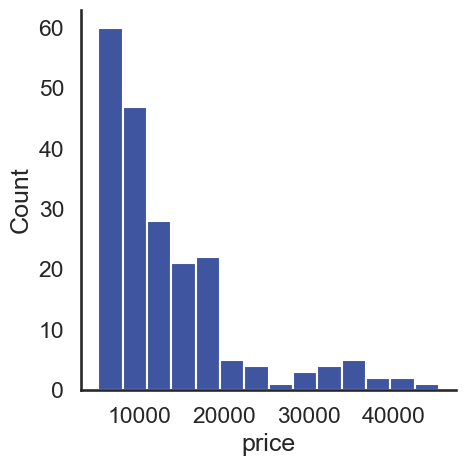

In [314]:
sns.displot(data['price']);

데이터 set에 있는 브랜드별 자동차 수

Text(0, 0.5, 'Count of Cars')

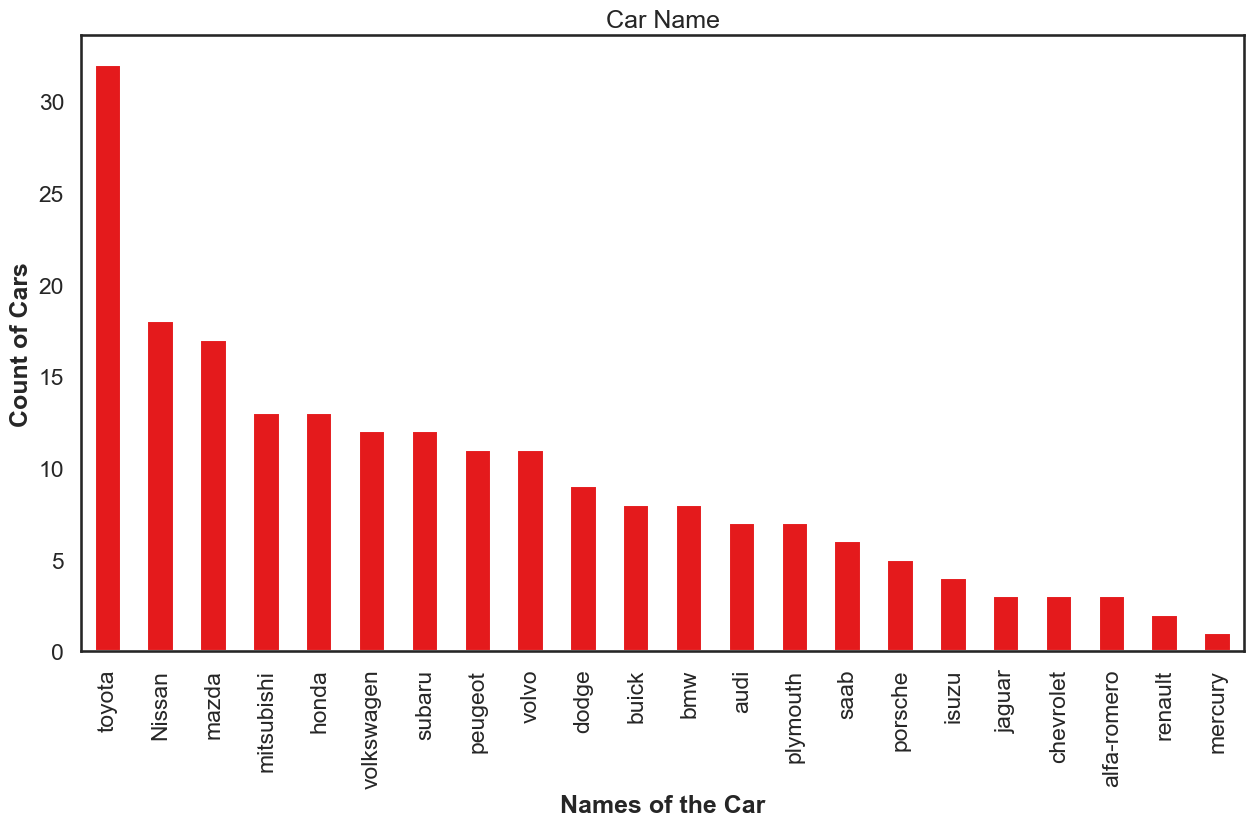

In [315]:
plt.rcParams['figure.figsize'] = [15,8]
ax=data['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('Car Name')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

브랜드 별 평균 가격

<Figure size 2000x600 with 0 Axes>

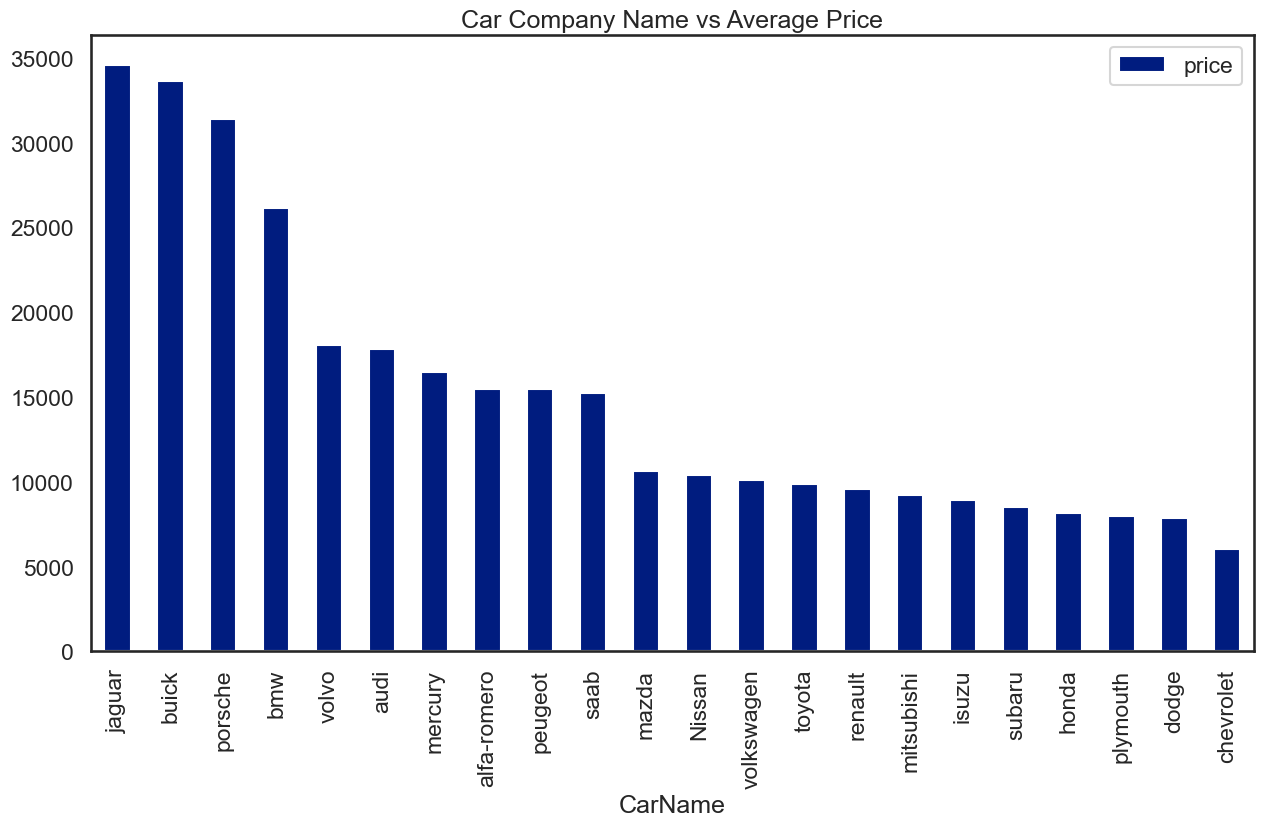

In [316]:
plt.figure(figsize=(20, 6))

data_x = pd.DataFrame(data.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
data_x.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

DoorNumber(차 문의 개수)에 따른 평균 가격

<Figure size 2000x600 with 0 Axes>

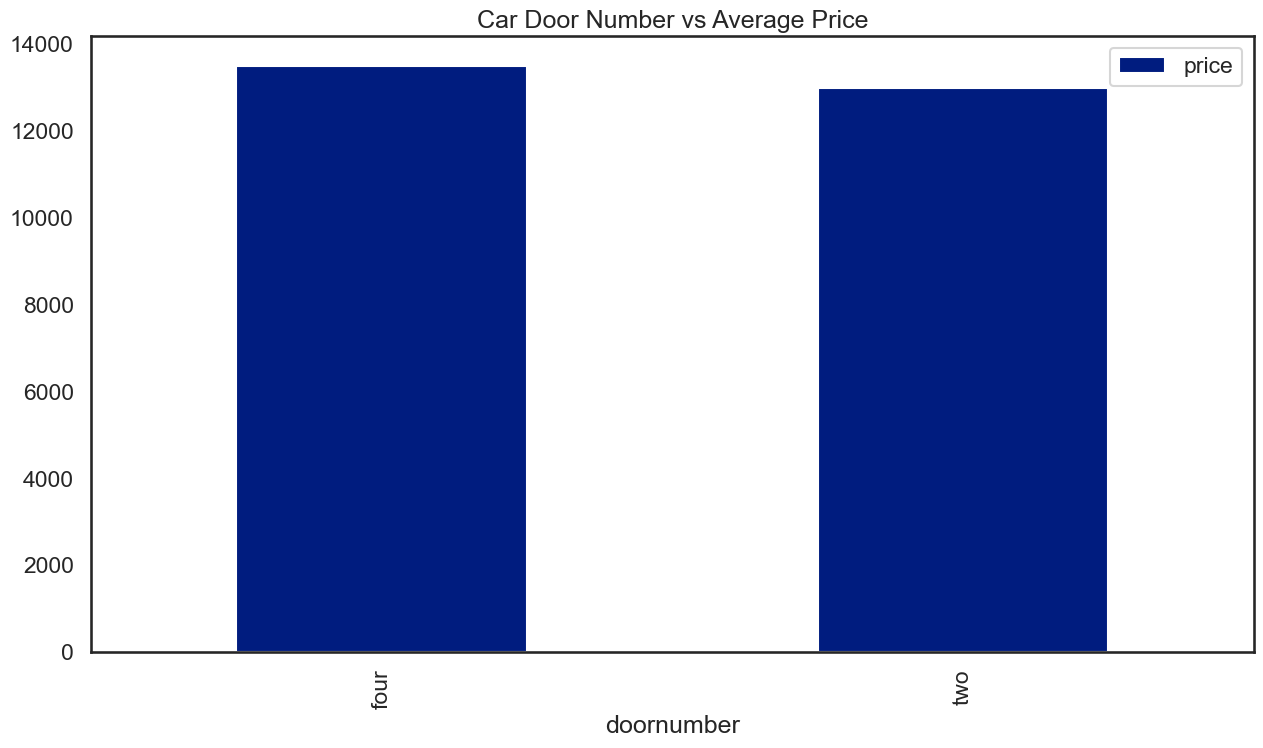

In [317]:
plt.figure(figsize=(20, 6))

data_x = pd.DataFrame(data.groupby(['doornumber'])['price'].mean().sort_values(ascending = False))
data_x.plot.bar()
plt.title('Car Door Number vs Average Price')
plt.show()

CarBody(차종)에 따른 가격

<Figure size 2000x600 with 0 Axes>

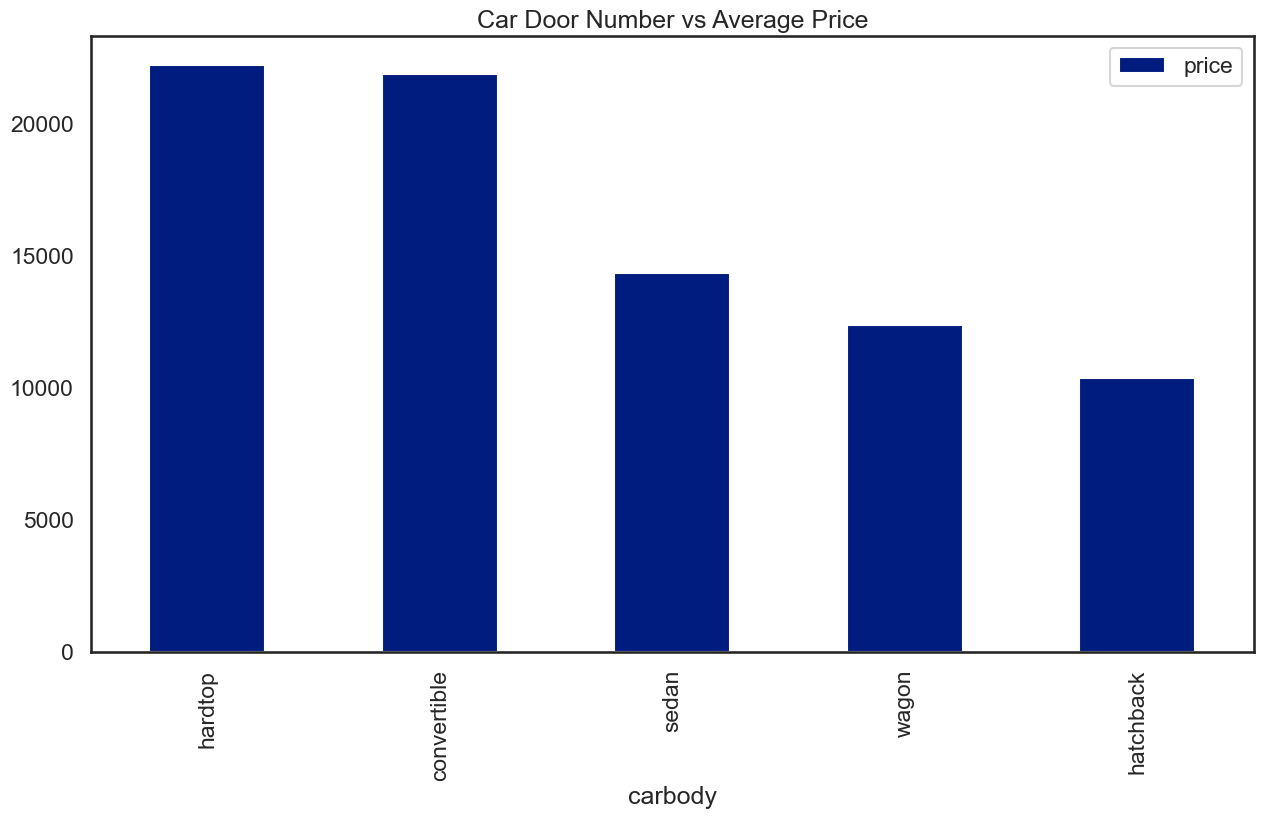

In [318]:
plt.figure(figsize=(20, 6))

data_x = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
data_x.plot.bar()
plt.title('Car Door Number vs Average Price')
plt.show()

In [319]:
# cat_col = data.select_dtypes(include=['object']).columns # category
# num_col = data.select_dtypes(exclude=['object']).columns # number

In [320]:
int_col = data.dtypes[data.dtypes == 'int64'].index
data[int_col] = data[int_col].astype(float)

In [321]:
# symboling is categorical feature
# symboling은 카테고리 feature이기 때문에 str로 변환
data['symboling'] = data['symboling'].astype(str)

In [322]:
# 자동차 브랜드는 feature에서 제외
data = data.drop('CarName', axis=1)

In [323]:
train = data.copy(deep=True) # 편향도 보정할 data set
beta = data.copy(deep=True)  # 편향도 보정없는 data set

In [324]:
# one-hot encoding
one_hot_encode_cols = beta.dtypes[beta.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

for col in one_hot_encode_cols:
    beta[col] = pd.Categorical(beta[col])

# Do the one hot encoding
beta = pd.get_dummies(beta, columns=one_hot_encode_cols)

In [325]:
# 결측치 처리
beta = beta.fillna(beta.mean())
print(beta.isnull().sum())

wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginesize               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0
symboling_-1.0           0
symboling_-2.0           0
symboling_0.0            0
symboling_1.0            0
symboling_2.0            0
symboling_3.0            0
fueltype_diesel          0
fueltype_gas             0
aspiration_std           0
aspiration_turbo         0
doornumber_four          0
doornumber_two           0
carbody_convertible      0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_4wd           0
drivewheel_fwd           0
drivewheel_rwd           0
enginelocation_front     0
enginelocation_rear      0
enginetype_dohc          0
e

In [326]:
# test_size 0.3 으로 split 진행
train, test = train_test_split(train, test_size=0.3, random_state=42)
train_beta, test_beta = train_test_split(beta, test_size=0.3, random_state=42)

In [327]:
print(train.shape[0])
print(test.shape[0])

143
62


### 데이터 correlation 확인
numeric한 feature들에 대해서만 진행

In [328]:
train_copy = train.select_dtypes(exclude="object")
scaler = StandardScaler()
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
train_copy[sig_num_col] = scaler.fit_transform(train_copy[sig_num_col])

In [329]:
train_copy.shape

(143, 14)

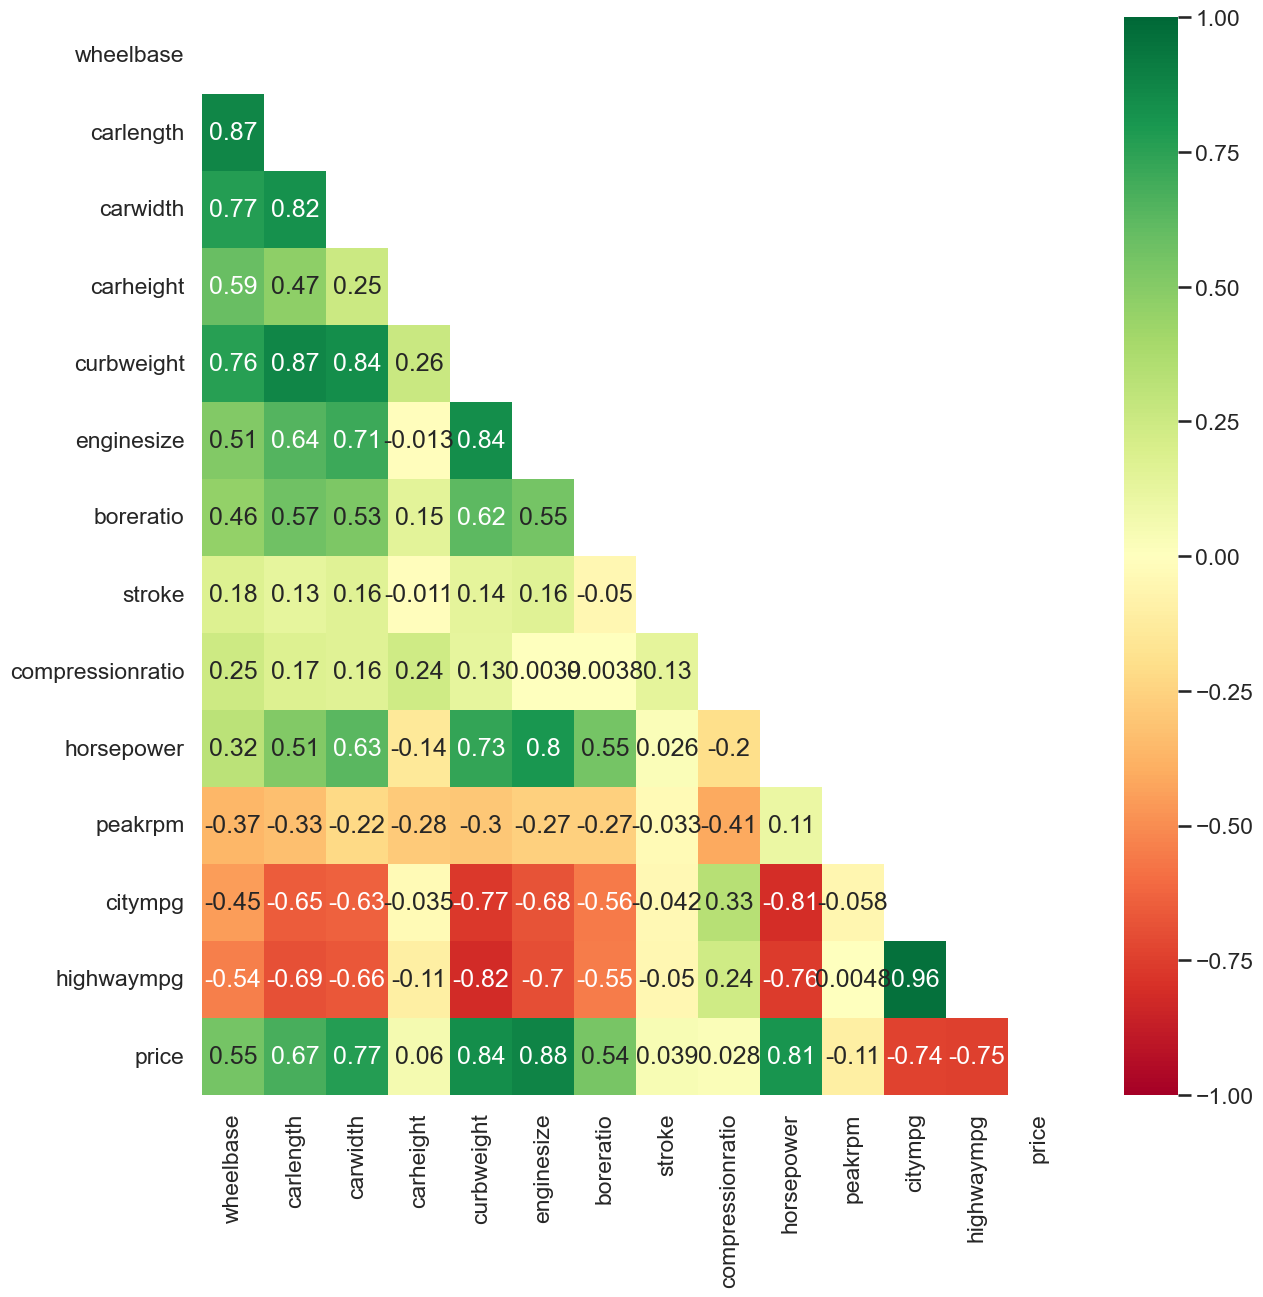

In [330]:
df = train_copy.corr()
mask = np.zeros_like(df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (14, 14))
sns.heatmap(df,
            cmap="RdYlGn",
            mask=mask,
            annot=True,
            vmin = -1,vmax = 1
            )
plt.show()

In [331]:
# 가격(price)과 correlation (절댓값)
df['price'].apply(lambda x: abs(x)).sort_values(ascending=False)

price               1.000000
enginesize          0.876751
curbweight          0.838979
horsepower          0.811184
carwidth            0.771034
highwaympg          0.749342
citympg             0.736946
carlength           0.673316
wheelbase           0.550372
boreratio           0.543367
peakrpm             0.108121
carheight           0.059881
stroke              0.039365
compressionratio    0.027901
Name: price, dtype: float64

### beta -> 원핫인코딩을 제외한 별다른 전처리 없이 Linear 모델 학습

In [332]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [333]:
train_y = train_beta["price"]
print(train_y.shape)
train_beta = train_beta.drop(labels="price", axis=1)
test_y = test_beta["price"]
test_beta = test_beta.drop(labels="price", axis=1)

(143,)


2949.962126750843


<AxesSubplot: xlabel='preds', ylabel='actual'>

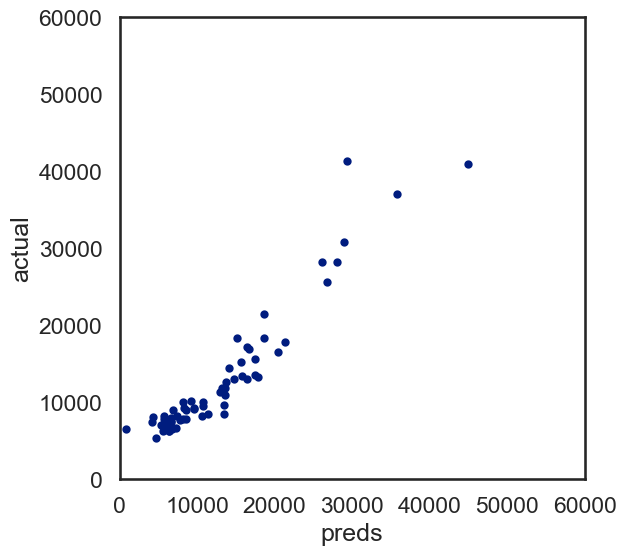

In [334]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
linearRegression_model = LinearRegression().fit(train_beta, train_y)
linear_pred_beta = linearRegression_model.predict(test_beta)
linearRegression_rmse_beta = rmse(linear_pred_beta, test_y)
two = pd.DataFrame({"preds": linear_pred_beta, "actual":test_y})

print(linearRegression_rmse_beta)
two.plot(x = "preds", y = "actual",kind = "scatter", xlim = [0, 6*1e4], ylim = [0, 6*1e4])

### 데이터 전처리 과정


array([[<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'log(price + 1)'}>],
       [<AxesSubplot: title={'center': 'sqrt'}>, <AxesSubplot: >]],
      dtype=object)

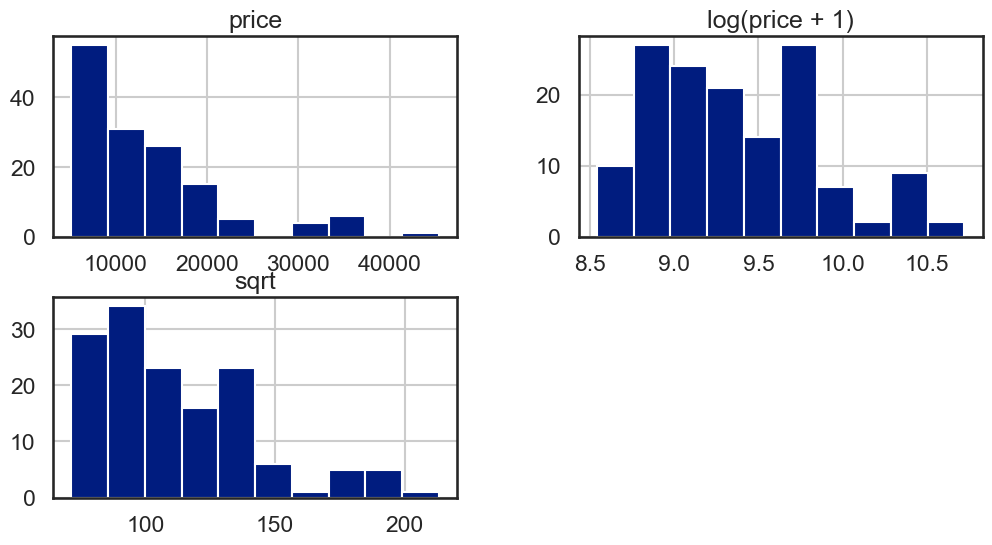

In [335]:
# 가격 편향도 체크
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["price"], "log(price + 1)":np.log1p(train["price"]), "sqrt":np.sqrt(train["price"])})
prices.hist()

In [336]:
# data -> 'price'를 제외한 data로 구성하여 편향도 체크
# all_data == data.drop(price)
data = data.drop('price', axis=1)

편향도를 확인하고, 데이터가 더 정규분포를 가지는 sqrt or log 함수를 선택함

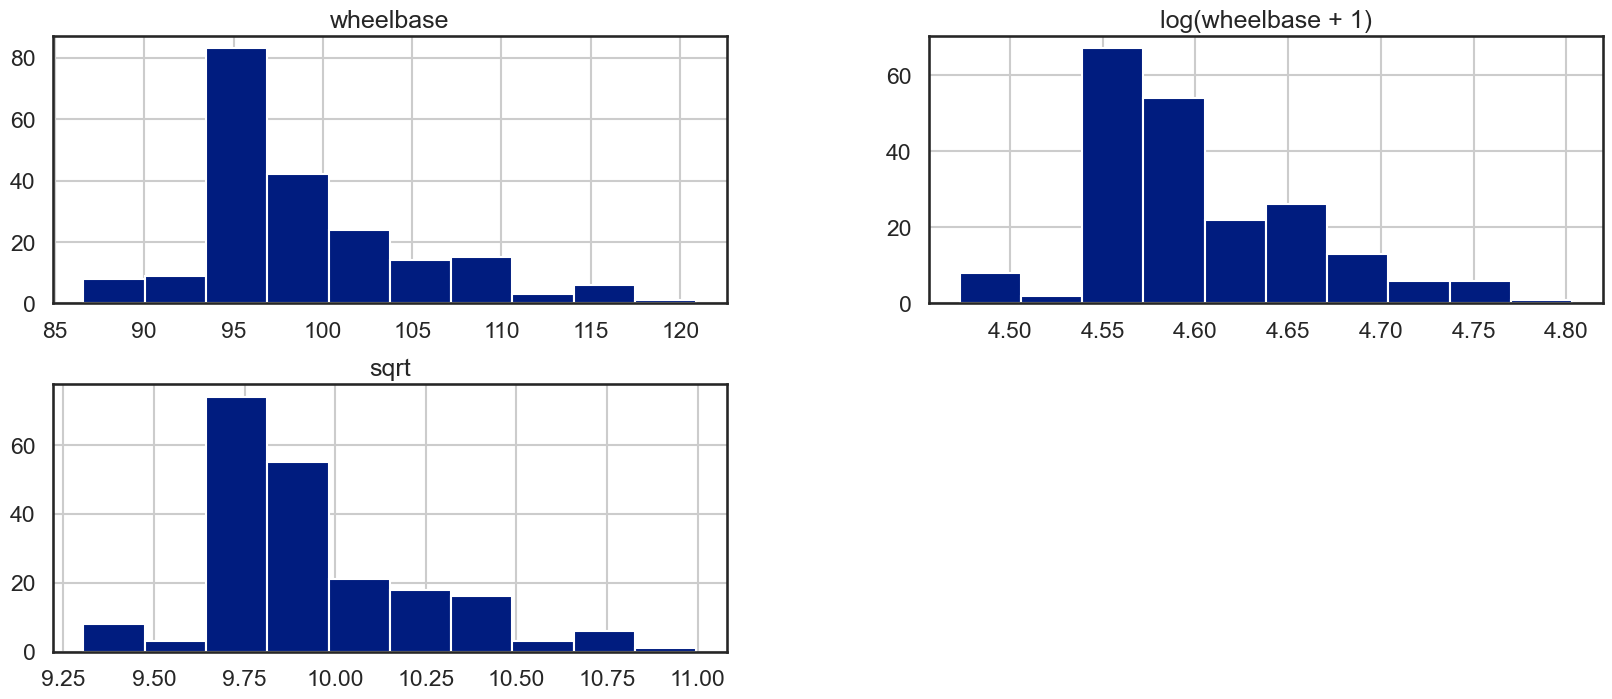

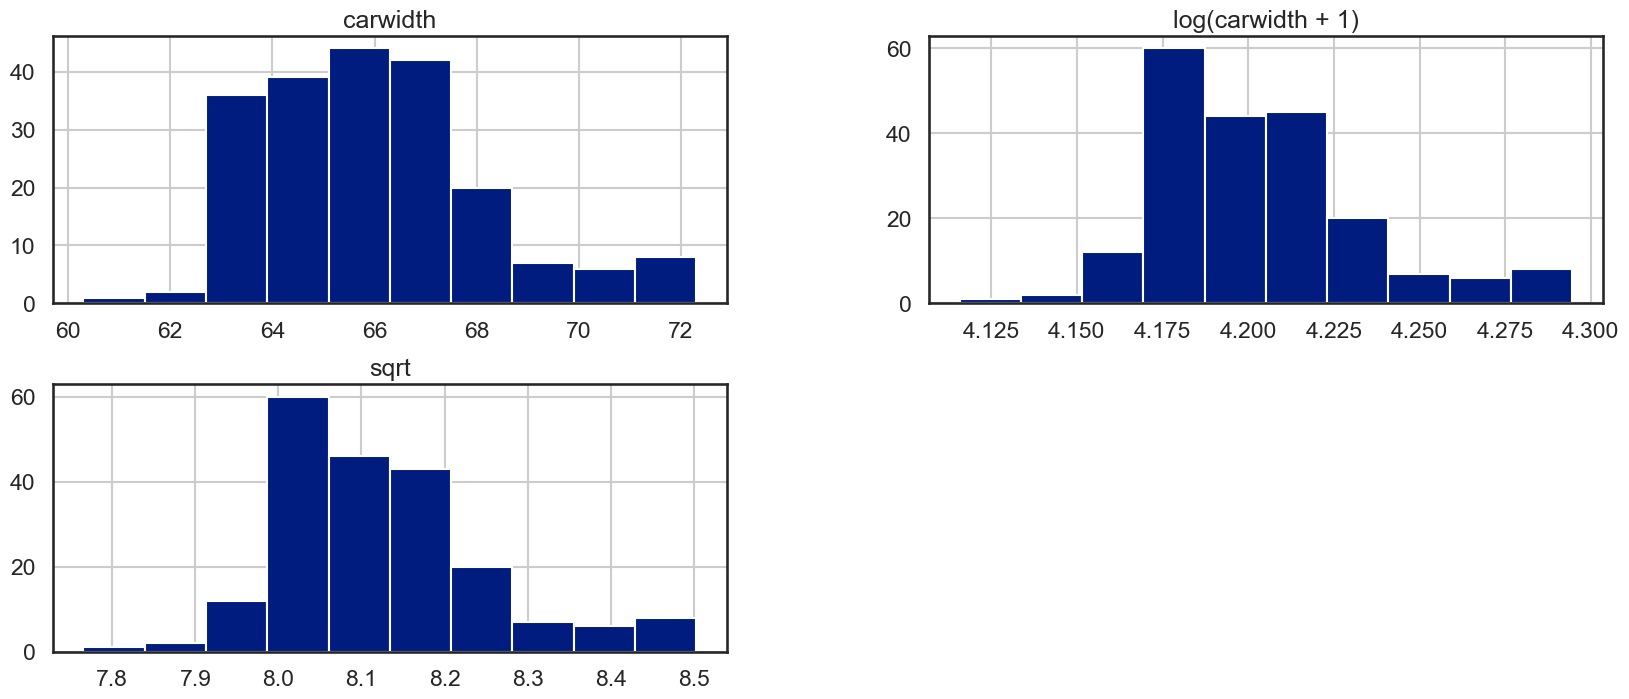

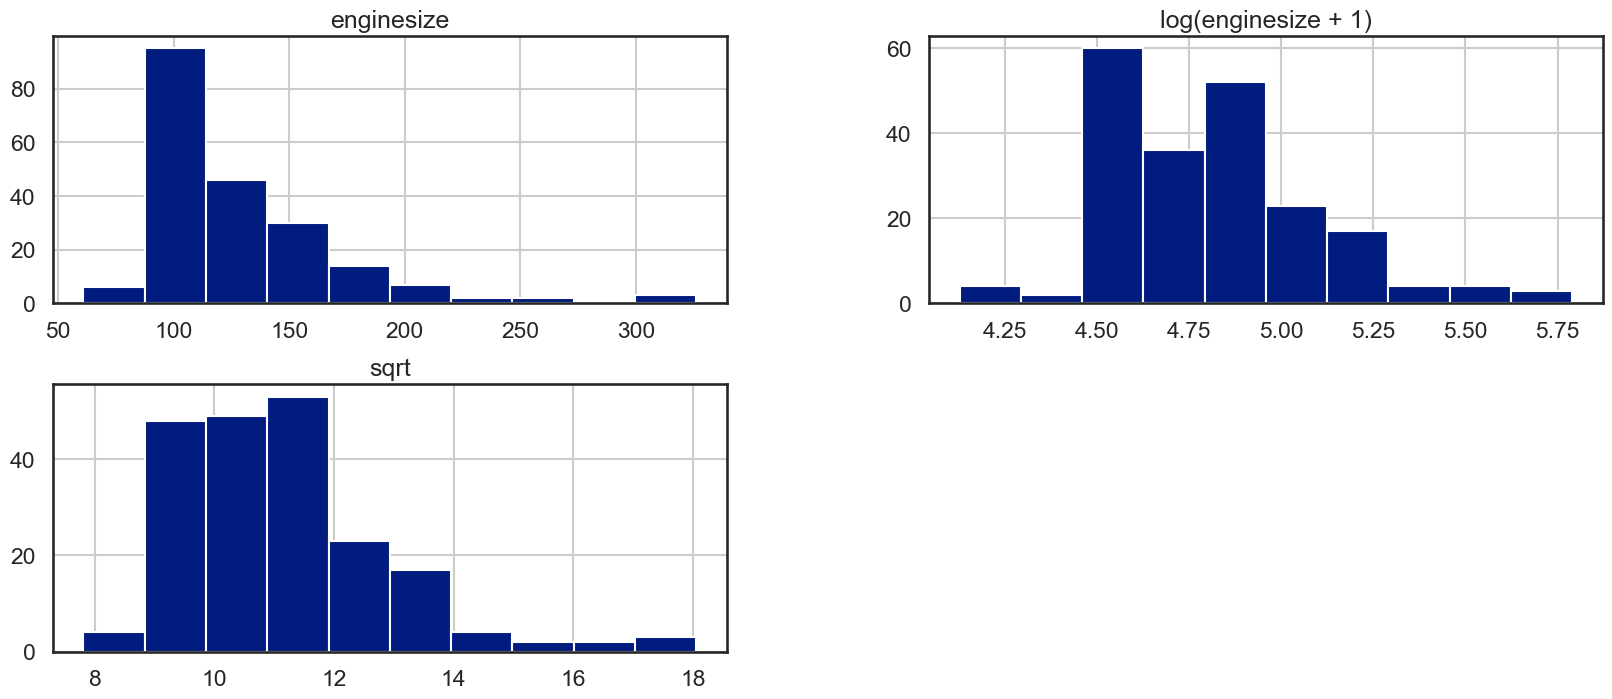

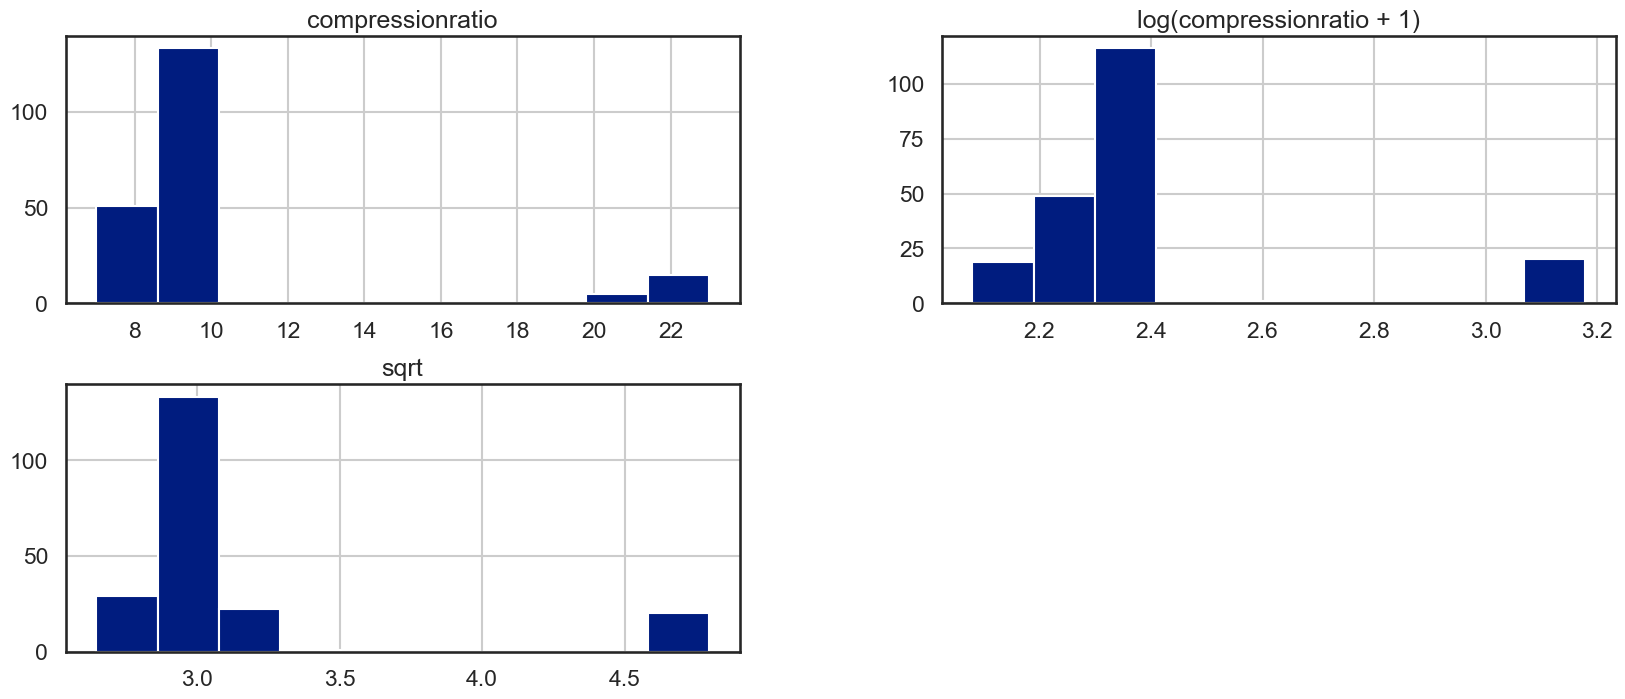

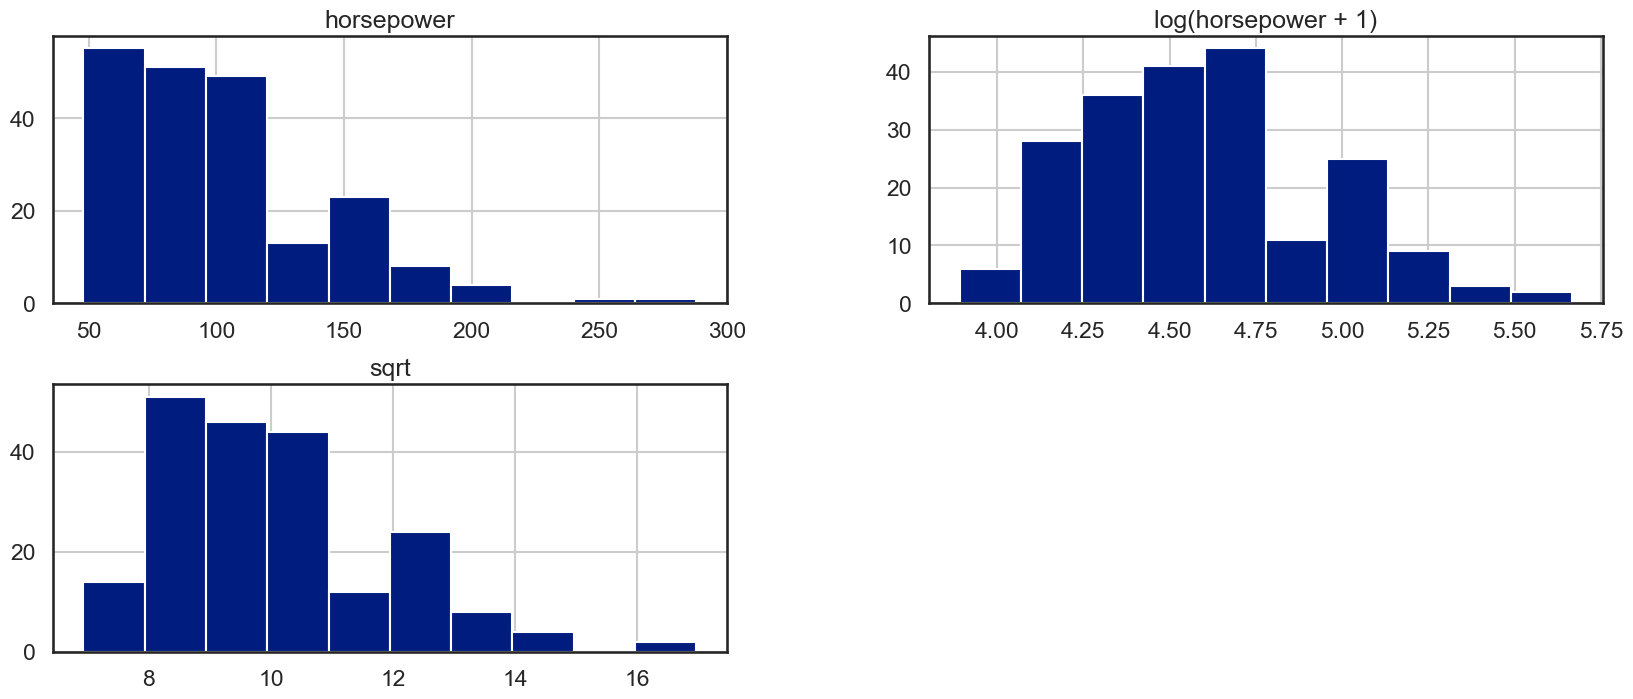

In [337]:
from scipy.stats import skew
numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
#편향성이 0.75이상이면 기억
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

log_idx = []
sqrt_idx = []
for i in skewed_feats:
    matplotlib.rcParams['figure.figsize'] = (20.0, 8.0)
    prices = pd.DataFrame({ i:data[i], "log(" + i + " + 1)":np.log1p(data[i]), "sqrt":np.sqrt(data[i])})

    prices.hist()
#해당 그림을 통해
#데이터 정규화를 log(x+1) or sqrt 로 진행(더 편향성이 적은 쪽으로 선택)


In [338]:
#가격(label)의 편향성이 심해, log를 통해 바꿔주는 코드.
train["price"] = np.log1p(train["price"])
test["price"] = np.log1p(test["price"])

#숫자값에 대한 feature의 인덱스를 받은 후, 이의 편향성을 고려하여 log로 편향성을 제거해주는 모습.
numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
#편향성이 0.75이상이면 기억
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
skewed_feats = skewed_feats.index

#abs로 0에 가까울수록 대칭적
#Log 함수를 통해 편향성을 완화하는 코드
for i in skewed_feats:
    log_val = abs(pd.DataFrame(np.log1p(data[i])).apply(lambda x: skew(x.dropna()))).values
    sqrt_val = abs(pd.DataFrame(np.sqrt(data[i])).apply(lambda x: skew(x.dropna()))).values
    if log_val < sqrt_val:
        data[i] = np.log1p(data[i])
    else:
        data[i] = np.sqrt(data[i])

# for i in skewed_feats:
#     data[i] = np.log1p(data[i])
    
print(data[skewed_feats].apply(lambda x: skew(x.dropna())))

wheelbase           0.878535
carwidth            0.809353
enginesize          0.858366
compressionratio    2.361613
horsepower          0.486346
dtype: float64


In [339]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# Here we see another way of one-hot-encoding:
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])
    
# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)

print(data.shape)
print(data.head)

(205, 57)
<bound method NDFrame.head of      wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0     4.495355      168.8  4.175925       48.8      2548.0    4.875197   
1     4.495355      168.8  4.175925       48.8      2548.0    4.875197   
2     4.559126      171.2  4.197202       52.4      2823.0    5.030438   
3     4.613138      176.6  4.207673       54.3      2337.0    4.700480   
4     4.609162      176.6  4.210645       54.3      2824.0    4.919981   
..         ...        ...       ...        ...         ...         ...   
200   4.701389      188.8  4.247066       55.5      2952.0    4.955827   
201   4.701389      188.8  4.245634       55.5      3049.0    4.955827   
202   4.701389      188.8  4.247066       55.5      3012.0    5.159055   
203   4.701389      188.8  4.247066       55.5      3217.0    4.983607   
204   4.701389      188.8  4.247066       55.5      3062.0    4.955827   

     boreratio  stroke  compressionratio  horsepower  ...  \
0         

In [340]:
#해당 코드로 결측치가 없음을 정확히 확인.
count = 0
for i in data.isnull().sum():
    if i > 0:
        count += 1
print(count)

0


In [341]:
X_train = data[:train.shape[0]]
X_test = data[train.shape[0]:]
print(X_train.shape)
print(X_test.shape)
y_train = train.price
y_test = test.price

(143, 57)
(62, 57)


전처리 과정을 거친 후, Linear 모델을 학습

In [342]:
linearRegression_model_biasprocessing = LinearRegression().fit(X_train, y_train)
linearRegression_rmse_bias = rmse(y_test, linearRegression_model_biasprocessing.predict(X_test))
print(linearRegression_rmse_bias)

0.6363880241298817


<AxesSubplot: xlabel='preds', ylabel='actual'>

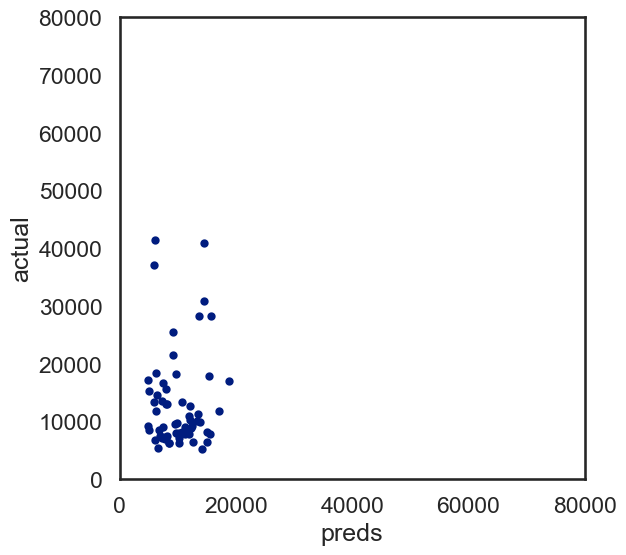

In [343]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

two = pd.DataFrame({"preds": np.expm1(linearRegression_model_biasprocessing.predict(X_test)), "actual":np.expm1(y_test)})

two.plot(x = "preds", y = "actual",kind = "scatter", xlim = [0, 8*1e4], ylim = [0, 8*1e4])

### 데이터 전처리 유무에 따른 학습결과 비교하는 그림
그림으로 확인해보면 편향도 전처리를 진행한 모델은 전처리를 진행하지 않은 모델보다 예측 성능이 크게 떨어짐을 확인할 수 있다. 따라서 전처리를 진행하지 않은 데이터(beta)로 진행

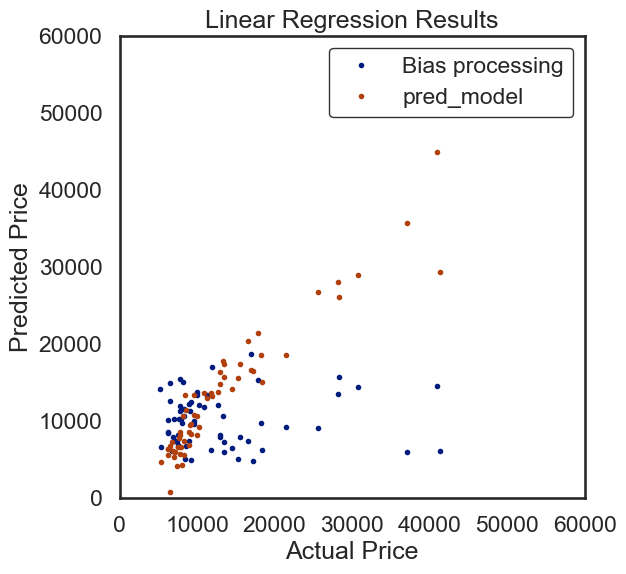

In [344]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.plot(np.expm1(y_test), np.expm1(linearRegression_model_biasprocessing.predict(X_test)), 
             marker='o', ls='', ms=3.0, label="Bias processing")
ax.plot(test_y, linearRegression_model.predict(test_beta), 
             marker='o', ls='', ms=3.0, label="pred_model")

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)
ax.set_xlim([0, 6*1e4])
ax.set_ylim([0, 6*1e4])
ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');


### Lasso 모델

In [345]:
# 전처리 없는 데이터로 진행
X_train = train_beta
X_test = test_beta
print(X_train.shape)
print(X_test.shape)
y_train = train_y
y_test = test_y

(143, 57)
(62, 57)


In [346]:
5e4

50000.0

In [347]:
alphas = [1, 0.5, 0.1, 0.01, 0.005 ,0.001, 0.0005, 0.0001]
model_lasso = LassoCV(alphas=alphas,
                  max_iter=int(5e4),
                  cv=3).fit(X_train, y_train)

In [348]:
lassoCV_rmse = rmse(y_test,model_lasso.predict(X_test))
print(lassoCV_rmse)

3019.831190852465


In [349]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)

lasso 모델이 44개의 feature만 선택하고 13개의 feature를 제거한 모습. intel ML에서 lasso를 진행했을 때는 하위 25%정도의 Feature만 제거한 경우와 비슷함을 볼 수 있다. 반대로 팀에서 진행한 다른 데이터 셋(House data set)에서의 lasso모델에서는 상당히 많은 feature를 제거함.
이는 lasso가 현재 car data set에서 모델의 학습에 좋은 데이터가 많이 있다고 추측한 것으로 보임.

In [350]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 44 variables and eliminated the other 13 variables


In [351]:
imp_coef = pd.concat([coef.sort_values().head(15),
                     coef.sort_values().tail(15)])

계수들을 양수와 음수 각각 15개 큰 값을 보여주는 모습\


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

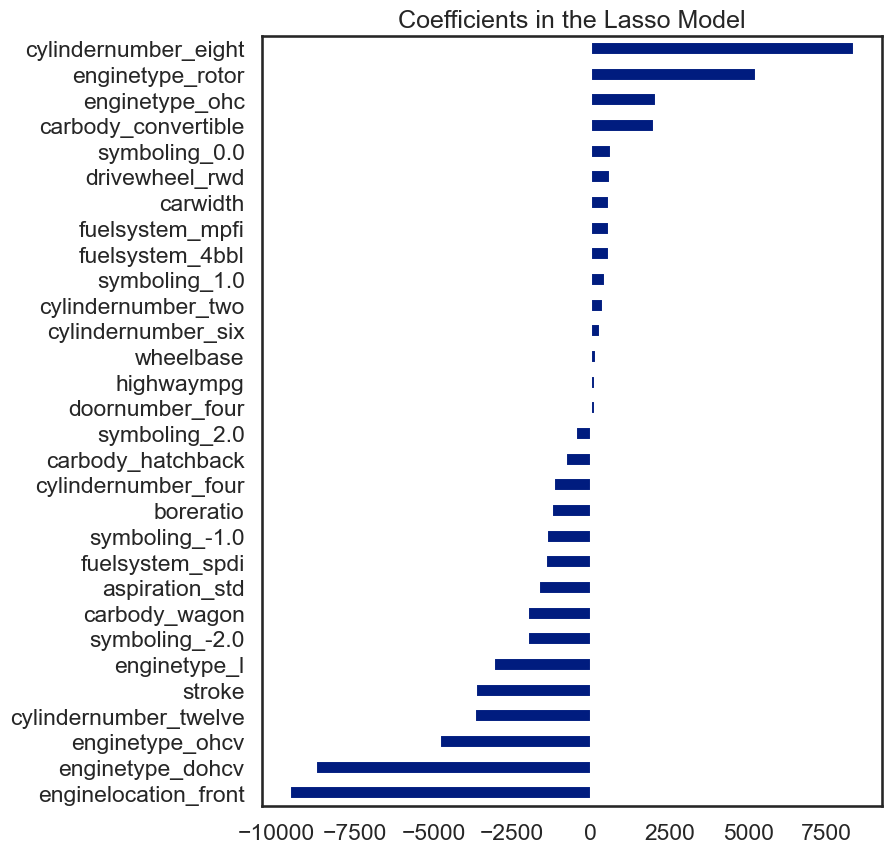

In [352]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

<AxesSubplot: xlabel='preds', ylabel='actual'>

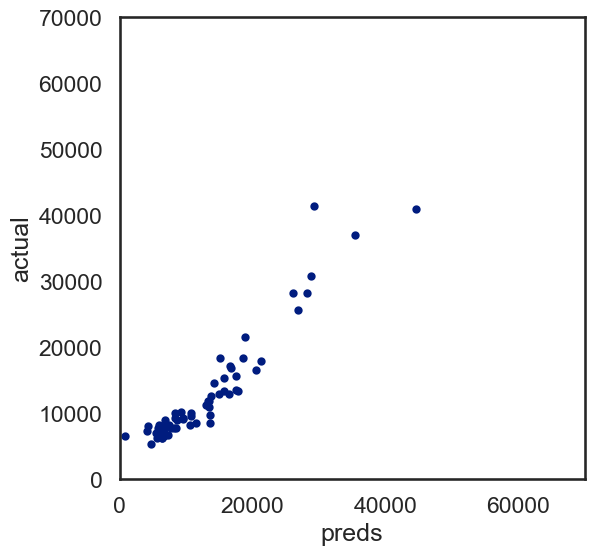

In [353]:
#let's look at the residuals as well:

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
lasso_pred = model_lasso.predict(X_test)
preds = pd.DataFrame({"preds": lasso_pred, "actual":y_test})

preds.plot(x = "preds", y = "actual",kind = "scatter", xlim = [0, 7*1e4], ylim = [0, 7*1e4])

### lasso/linear 비교
두 모델의 RMSE를 보면 크게 차이가 나지 않음을 확인할 수 있다. 이는 lasso에서 feature 수를 많이 버리지 않았고, data set의 크기가 작으며 feature의 개수 또한 작은 것에 영향을 받았을 것이라 생각한다.

In [354]:
rmse_vals = [linearRegression_rmse_beta, lassoCV_rmse]
labels = ['Linear', 'Lasso']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
print(rmse_df)

               RMSE
Linear  2949.962127
Lasso   3019.831191


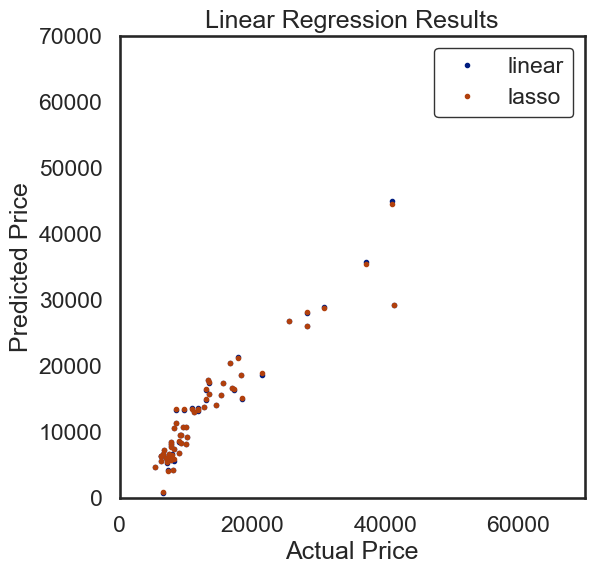

In [355]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.plot(y_test, linear_pred_beta, 
             marker='o', ls='', ms=3.0, label="linear")
ax.plot(y_test, lasso_pred, 
             marker='o', ls='', ms=3.0, label="lasso")

leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)
ax.set_xlim([0, 7*1e4])
ax.set_ylim([0, 7*1e4])
ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');

### SGD 방법 채택
학습속도를 조정하지 않은 채 SGD를 적용하였을 경우 발산하는 모습을 확인할 수 있다.

In [356]:
model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': model_lasso.alpha_},
}
new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)

print(rmse_df)

               RMSE      RMSE-SGD
Linear  2949.962127  3.985576e+16
Lasso   3019.831191  1.400690e+15


학습속도를 조정하여 발산을 방지해준다. RMSE가 급격히 낮아지다가 다시 높아지는 것을 확인할 수 있다.

Linear : 1e-09
Lasso : 1e-07


,RMSE,RMSE-SGD
Linear,2949.962127,5244.291019
Lasso,3019.831191,5163.752727


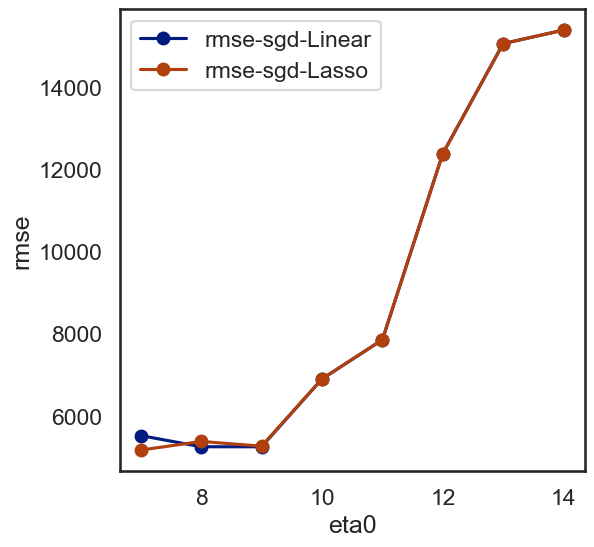

In [357]:
new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    rmse_eta0 = []
    for i in range(7,15):
        SGD = SGDRegressor(eta0=10**(-i),**parameters)
        SGD.fit(X_train, y_train)
        rmse_eta0.append(rmse(y_test, SGD.predict(X_test)))
    new_rmses[modellabel] = min(rmse_eta0)
    print(f'{modellabel} : {10**-(7+rmse_eta0.index(min(rmse_eta0)))}')
    plt.plot(range(7,15), rmse_eta0, marker='o', alpha=1, label='rmse-sgd-' + modellabel)
    plt.xlabel('eta0')
    plt.ylabel('rmse')
    plt.legend()

    
rmse_df['RMSE-SGD'] = pd.Series(new_rmses)

rmse_df

StandardScaler와 MinMaxScaler를 적용한 모습이다.


In [358]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-stdscaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-stdscaled
Linear,2949.962127,5244.291019,3080.886153
Lasso,3019.831191,5163.752727,3778.030702


Linear : 0.01
Lasso : 0.01


,RMSE,RMSE-SGD,RMSE-SGD-stdscaled,stdscaled+학습율조정
Linear,2949.962127,5244.291019,3080.886153,3093.400666
Lasso,3019.831191,5163.752727,3778.030702,3759.790185


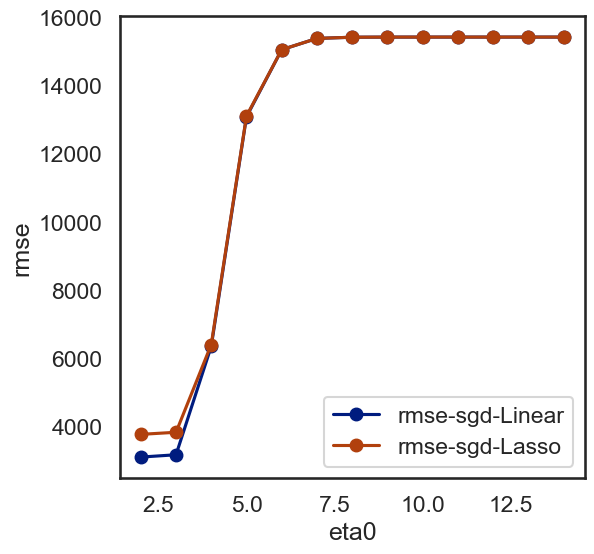

In [359]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    rmse_eta0 = []
    for i in range(2,15):
        SGD = SGDRegressor(eta0=10**(-i),**parameters)
        SGD.fit(X_train_scaled, y_train)
        rmse_eta0.append(rmse(y_test, SGD.predict(X_test_scaled)))
    new_rmses[modellabel] = min(rmse_eta0)
    # print(rmse_eta0)
    print(f'{modellabel} : {10**-(2+rmse_eta0.index(min(rmse_eta0)))}')
    plt.plot(range(2,15), rmse_eta0, marker='o', alpha=1, label='rmse-sgd-' + modellabel)
    plt.xlabel('eta0')
    plt.ylabel('rmse')
    plt.legend()

rmse_df['stdscaled+학습율조정'] = pd.Series(new_rmses)
rmse_df

In [360]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-mmscaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-stdscaled,stdscaled+학습율조정,RMSE-SGD-mmscaled
Linear,2949.962127,5244.291019,3080.886153,3093.400666,3634.274456
Lasso,3019.831191,5163.752727,3778.030702,3759.790185,5945.683961


Linear : 0.1
Lasso : 0.01


,RMSE,RMSE-SGD,RMSE-SGD-stdscaled,stdscaled+학습율조정,RMSE-SGD-mmscaled,mmscaled+학습율조정
Linear,2949.962127,5244.291019,3080.886153,3093.400666,3634.274456,3623.769257
Lasso,3019.831191,5163.752727,3778.030702,3759.790185,5945.683961,5909.125038


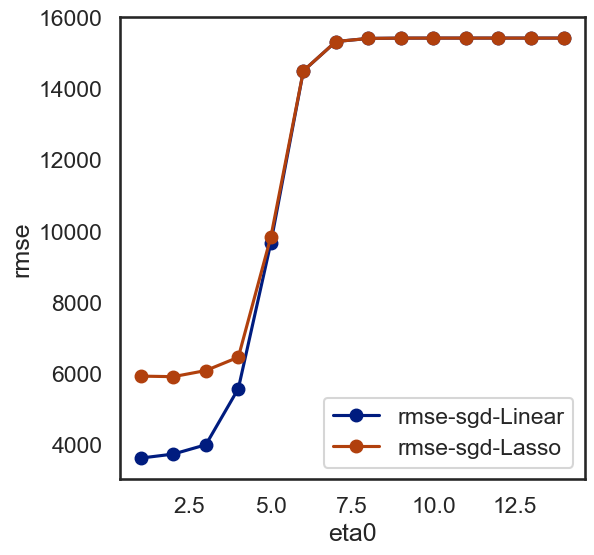

In [361]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    rmse_eta0 = []
    for i in range(1,15):
        SGD = SGDRegressor(eta0=10**(-i),**parameters)
        SGD.fit(X_train_scaled, y_train)
        rmse_eta0.append(rmse(y_test, SGD.predict(X_test_scaled)))
    new_rmses[modellabel] = min(rmse_eta0)
    # print(rmse_eta0)
    print(f'{modellabel} : {10**-(1+rmse_eta0.index(min(rmse_eta0)))}')
    plt.plot(range(1,15), rmse_eta0, marker='o', alpha=1, label='rmse-sgd-' + modellabel)
    plt.xlabel('eta0')
    plt.ylabel('rmse')
    plt.legend()

rmse_df['mmscaled+학습율조정'] = pd.Series(new_rmses)
rmse_df

standardscaler를 적용한 데이터를 SGD를 이용하여 예측한 모습이다.
linear model은 SGD를 적용한 전후가 비슷한 RMSE값을 보여주지만,
Lasso model은 SGD를 적용한 후에 증가된 RMSE값을 보여준다.
전체적으로 StandardScaler가 MinMaxScaler보다 RMSE값이 낮은 것으로 보아, intel ML에서 본 것처럼, Standard로 진행했을 때 MinMax보다 더 좋은 결과를 가져오는 것을 확인할 수 있다. 아마도 해당 데이터와 모델에서 Standard가 더 잘 맞는 것 같다.
팀에서 House data set으로 진행한 결과와는 반대의 결과를 보여줬다.

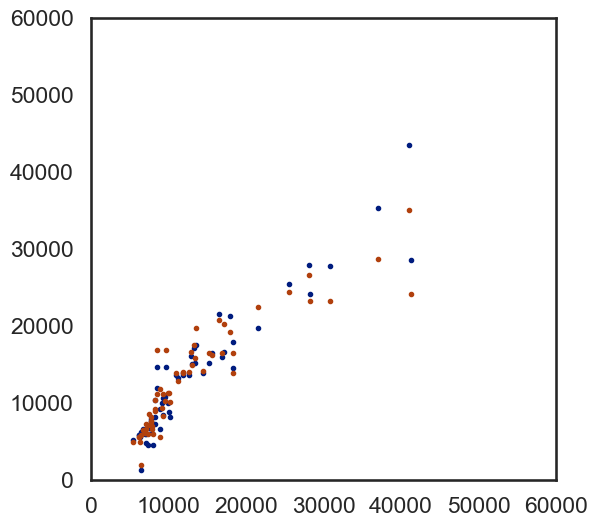

In [362]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
f = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_xlim([0, 6*1e4])
ax.set_ylim([0, 6*1e4])
new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-2,**parameters)
    SGD.fit(X_train_scaled, y_train)
    ax.plot(y_test, SGD.predict(X_test_scaled), 
             marker='o', ls='', ms=3.0, label=modellabel)

### 결론

- 해당 데이터에서는 linear가 lasso보다 좋은 결과를 보였다. feature 수가 적었으며, lasso에서 버리는 feature 수 또한 적었다. intel ML에서 진행했던 결과와 비슷한 결과를 볼 수 있었다. --> 비교적 feature가 적은 경우 Linear가 효율적이라는 것을 알 수 있었다.

- SGD를 이용하여 데이터를 학습시켰는데, 데이터의 양이 너무 적어 별다른 이득을 보지 못했던 것 같다. 학습률을 조정하여 SGD를 적용해보았지만, 이 또한 너무 적은 데이터 수 때문인지 좋은 결과를 보여주지 못했다.

- 결론적으로, feature가 적은 경우 lasso가 linear보다 좋은 결과를 얻지는 못하는 것을 확인할 수 있었다. SGD와 같은 경우에는 본래 학습률을 조절하여 좋은 결과를 얻을 수 있지만, 현재 car data set 자체가 가지는 데이터의 수가 너무 적어 좋지 못한 결과를 얻었다.